In [68]:
import numpy as np
import pandas as pd

In [69]:
target_labels = {
    "unacc": 0,
    "acc": 1,
    "good": 2,
    "vgood": 3,
}

In [70]:
df = pd.read_csv("cars_dataset.csv", sep=',')
df

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,two,two,small,low,unacc
1,vhigh,vhigh,two,two,small,med,unacc
2,vhigh,vhigh,two,two,small,high,unacc
3,vhigh,vhigh,two,two,med,low,unacc
4,vhigh,vhigh,two,two,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [71]:
dfY = pd.DataFrame(df["car"].map(target_labels))
dfY

,car
0,0
1,0
2,0
3,0
4,0
...,...
1723,2
1724,3
1725,0
1726,2


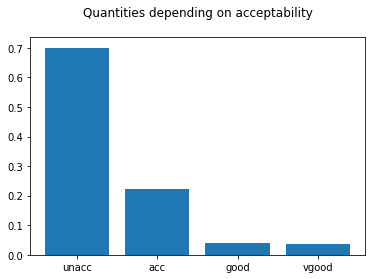

In [73]:
# graphics
from matplotlib import pyplot as plt

x, y = zip(*dict(df["car"].value_counts(normalize=True)).items())

plt.bar(x, y)
plt.title("Quantities depending on acceptability\n")
plt.savefig('graph.png')
plt.show()

In [74]:
dfX = df.drop("car", axis=1)
dfX

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,two,two,small,low
1,vhigh,vhigh,two,two,small,med
2,vhigh,vhigh,two,two,small,high
3,vhigh,vhigh,two,two,med,low
4,vhigh,vhigh,two,two,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [75]:
from sklearn.preprocessing import OneHotEncoder


def normalize_columns(columns):
    col = dfX.columns
    r_patterns = list(map(lambda x: f"x{x}", range(len(col))))
    for c in columns:
        for index, pattern in enumerate(r_patterns):
            if pattern in c:
                yield c.replace(pattern, col[index], 1)
                break


onehotencoder = OneHotEncoder(sparse=False, dtype=int)
enc_X = onehotencoder.fit_transform(dfX)
dfX = pd.DataFrame(enc_X, columns=normalize_columns(onehotencoder.get_feature_names()))
dfX

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_5more,doors_four,...,doors_two,persons_four,persons_more,persons_two,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1724,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1725,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1


In [76]:
from sklearn.model_selection import train_test_split

dfX_train, dfX_test, dfY_train, dfY_test = train_test_split(dfX, dfY, test_size=0.3, random_state=42)
dfX_train

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_5more,doors_four,...,doors_two,persons_four,persons_more,persons_two,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
1178,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0
585,0,0,0,1,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
1552,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
1169,0,0,0,1,1,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
1033,0,0,0,1,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1294,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
860,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1459,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1


In [77]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

model = keras.Sequential([
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(len(target_labels), activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [78]:
model.fit(dfX_train.values, dfY_train.values, epochs=10)
test_loss, test_acc = model.evaluate(dfX_test,  dfY_test, verbose=2)

print("Accuracy:", test_acc)

Train on 1209 samples
Epoch 1/10
1209/1209 [==============================] - 0s 228us/sample - loss: 0.7486 - accuracy: 0.7064
Epoch 2/10
1209/1209 [==============================] - 0s 55us/sample - loss: 0.4150 - accuracy: 0.8528
Epoch 3/10
1209/1209 [==============================] - 0s 56us/sample - loss: 0.2902 - accuracy: 0.8784
Epoch 4/10
1209/1209 [==============================] - 0s 59us/sample - loss: 0.2233 - accuracy: 0.9247
Epoch 5/10
1209/1209 [==============================] - 0s 57us/sample - loss: 0.1800 - accuracy: 0.9438
Epoch 6/10
1209/1209 [==============================] - 0s 56us/sample - loss: 0.1537 - accuracy: 0.9586
Epoch 7/10
1209/1209 [==============================] - 0s 54us/sample - loss: 0.1296 - accuracy: 0.9686
Epoch 8/10
1209/1209 [==============================] - 0s 56us/sample - loss: 0.1168 - accuracy: 0.9702
Epoch 9/10
1209/1209 [==============================] - 0s 53us/sample - loss: 0.1016 - accuracy: 0.9744
Epoch 10/10
1209/1209 [=========